# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 26

**Author 1 (sciper):** Ziad Sahlab (320894)  
**Author 2 (sciper):** Mouadh Sadani (367026)   
**Author 3 (sciper):** Mehmet Riza Arseven (283446)   

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

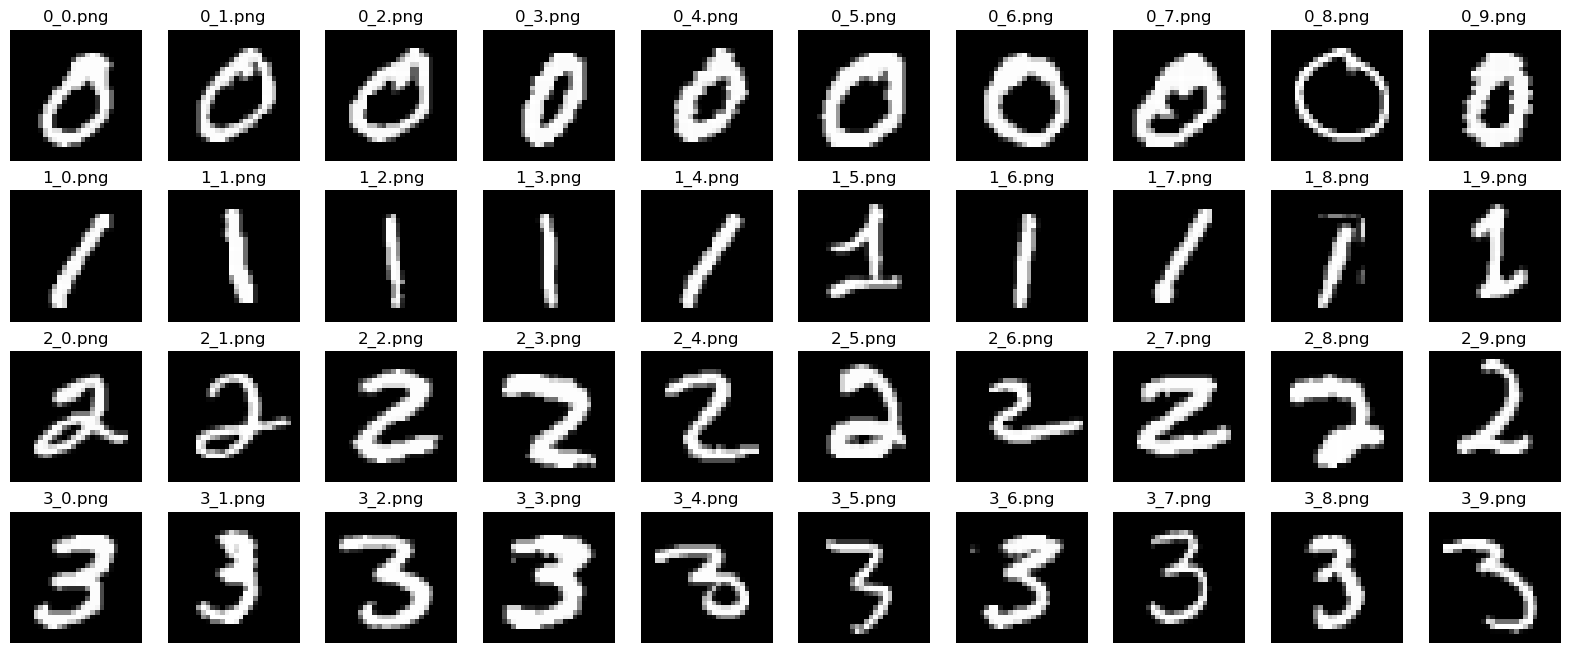

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [3]:
# TODO
import cv2
import numpy as np
print(np.shape(zeros_im))
scale_percent = 600 # percent of original size
width = int(zeros_im[0].shape[1] * scale_percent / 100)
height = int(zeros_im[0].shape[0] * scale_percent / 100)
dim = (width, height)

zeros_im_big=np.zeros((10,width, height))
ones_im_big=np.zeros((10,width, height))

for i in range (0,len(zeros_im)):

    
    # resize image
    zeros_im_big[i] = cv2.resize(zeros_im[i], dim, interpolation = cv2.INTER_AREA)
    ones_im_big[i] = cv2.resize(ones_im[i], dim, interpolation = cv2.INTER_AREA)

    zeros_im_big[i]=cv2.blur(zeros_im_big[i], ksize=(20,20))
    ones_im_big[i]=cv2.blur(ones_im_big[i], ksize=(20,20))
    
    zeros_im_big[i]=zeros_im_big[i] > 100
    ones_im_big[i]=ones_im_big[i] > 100
    
    #you can call this function directly for both of them if you want
def process_images(images):
    scale_percent = 600 # percent of original size
    width = int(images[0].shape[1] * scale_percent / 100)
    height = int(images[0].shape[0] * scale_percent / 100)
    dim = (width, height)
            
    im_big=np.zeros((len(images),width, height))
            

    for i in range (0,len(images)):
    # resize image
        im_big[i] = cv2.resize(images[i], dim, interpolation = cv2.INTER_AREA)
        #sharpen image
        im_big[i]=cv2.blur(im_big[i], ksize=(20,20))
        #apply a threshold
        im_big[i]=im_big[i] > 100

    return im_big

(10, 28, 28)


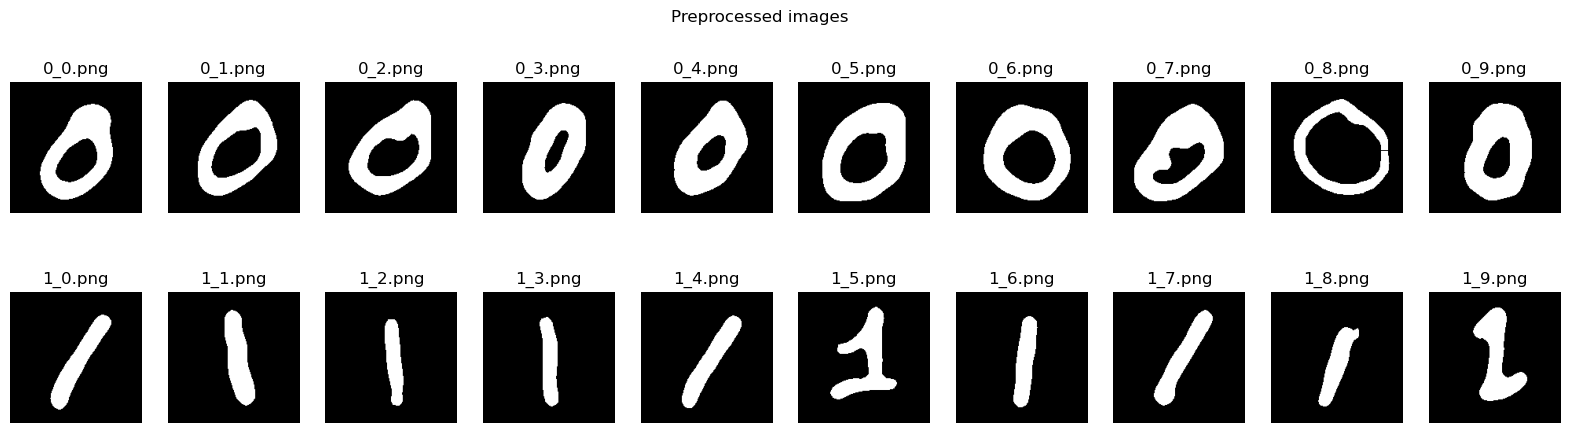

In [4]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = zeros_im_big
ones = ones_im_big

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

TODO

### 1.2. Get descriptors (4 pts)

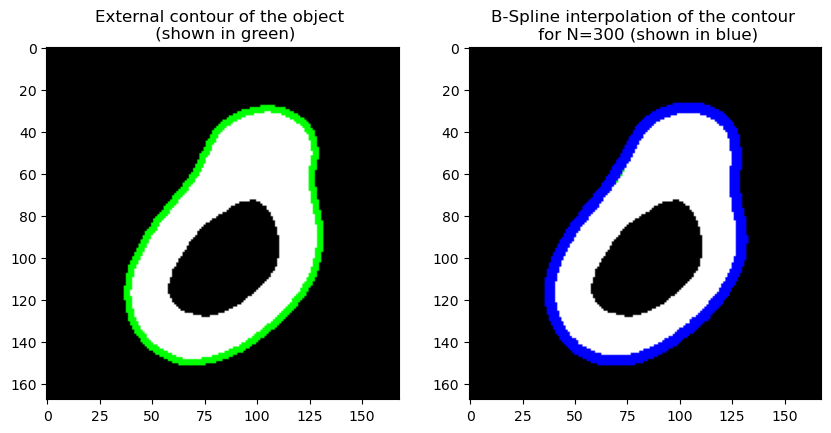

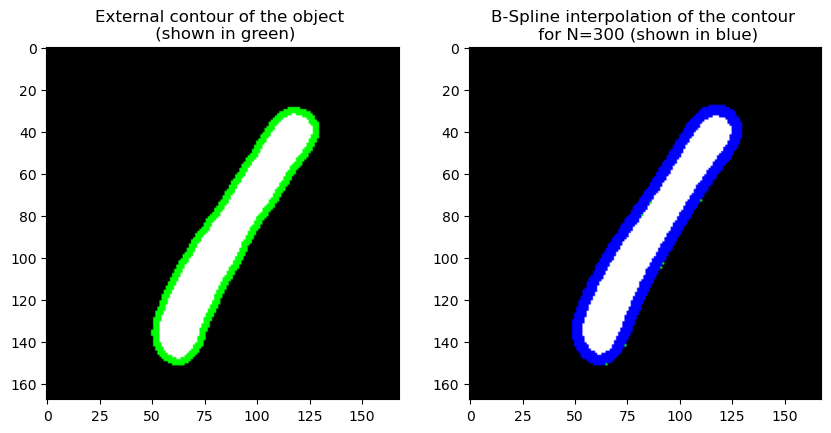

In [5]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

# TODO

import cv2
import numpy as np
from scipy import interpolate
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

def get_descriptors(img, plot_cnt):
    
    if plot_cnt==True:
        fig, ax = plt.subplots(1,2, figsize=(10,10)) 
    # Find contours in the binary image
    img=cv2.convertScaleAbs(img)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    # Select the outermost contour
    contour = max(contours, key=cv2.contourArea)
    
    # Interpolate the contour to get equidistant points
    N = 300  # number of points to interpolate
    contour_pts = np.squeeze(contour) #remove any unnecessary dimensions.
    
    x = contour_pts[:, 0]
    y = contour_pts[:, 1]
    tck, _ = interpolate.splprep([x, y], s=50, per=True) #generate a B-spline representation of the contour
    u = np.linspace(0, 1, N) #array of N equally spaced values between 0 and 1
    x, y = interpolate.splev(u, tck) #generate set of N equidistant points that lie along the contour.
    
    
    img_where=np.where(img==1)
    blank_image = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
    
    for i in range(0, len(img_where[0])):
        blank_image[img_where[0][i]][img_where[1][i]]=(255,255,255)
    
    cnt_image=blank_image
    cnt_image=cv2.drawContours(cnt_image, contours, 0, (0,255,0), 2)
    
    if plot_cnt==True:
        ax[0].imshow(cnt_image)
        ax[0].set_title("External contour of the object \n (shown in green)")
   
    for i in range(0, len(x)):
        cv2.circle(blank_image, (int(x[i]),int(y[i])), 1, (0,0,255), 2)
        
        
    # Calculate the Fourier descriptors
    if plot_cnt==True:
        ax[1].imshow(blank_image)
        ax[1].set_title("B-Spline interpolation of the contour \n for N=300 (shown in blue)")
    
    
    z = x + 1j * y
    descriptor = np.fft.fft(z)
    
    return descriptor

# Check first 10 descriptors of a test image (just to check that your pipeline works well)

points_zeros = get_descriptors(zeros[0], plot_cnt=True)[:10]
points_ones = get_descriptors(ones[0], plot_cnt=True)[:10]



#### Discussion

The results show that the function is working as expected. The contour, after applying interpolation to obtain a set of equidistant points using a B-spline representation, is visually similar to the original contour. Additionally, increasing the number of Fourier descriptors used in the reconstruction process results in a more accurate representation of the original contour. If the number of points to interpolate (N) is odd, the interpolated set of points will have a midpoint, which can cause problems when calculating the Fourier descriptors. In this case, it is necessary to remove the midpoint before applying the Fourier transform. The resulting set of descriptors can be used to reconstruct the shape of the object, as it contains information about the object's contour and curvature at various frequencies.

### 1.3. Study effect of descriptors (6 pts)

In [6]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 100]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros[5]
one = ones[5]

In [7]:
# Implement reconstruction
def reconstruct_contour(descriptor, N):
    descriptor_reduced = np.zeros(len(descriptor), dtype=complex) #create an empty array to store the new contour
    descriptor_reduced[:N] = descriptor[:N] # keep first N coefficients
    descriptor_reduced[-N:] = descriptor[-N:] # keep last N coefficients
    
    contour_recon = np.fft.ifft(descriptor_reduced) #apply inverse fourier transform

    '''uncomment these lines to observe the ordering (which coefficients correspond to 
    positive/negative frequencies of components)'''

    #freq = np.fft.fftfreq(descriptor_reduced.size)
    #print("Signal: ", descriptor_reduced)
    #print("IFFT: ", contour_recon)
    #print("Sample Frequencies: ", freq)

    # Extract real and imaginary components of contour
    contour_x = np.real(contour_recon)
    contour_y = np.imag(contour_recon)

    # Flip contour to correct reflection effect
    contour_x = np.flip(contour_x)
    contour_y = -np.flip(contour_y)

    return contour_x, contour_y


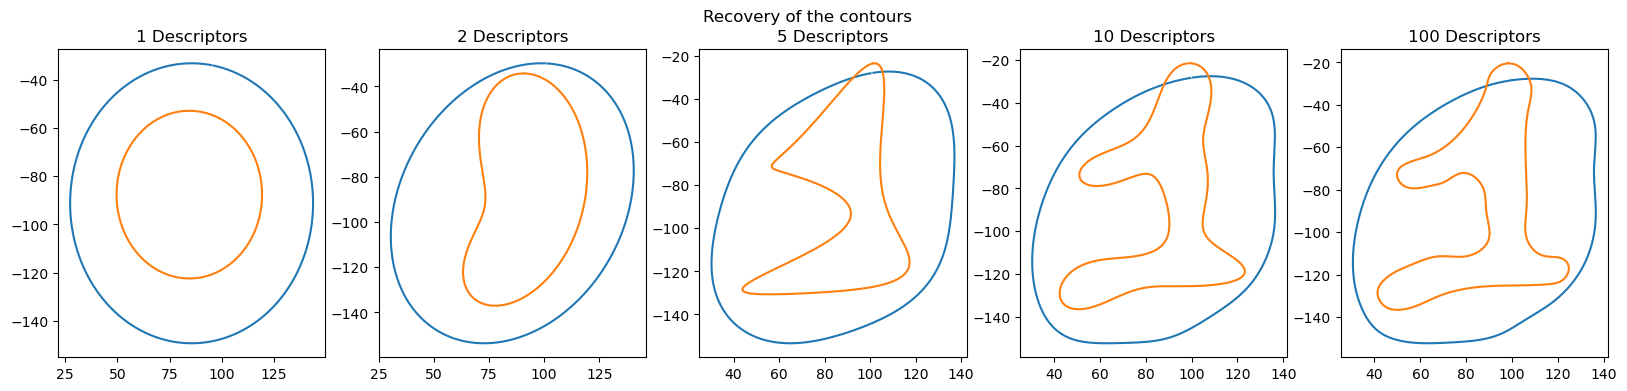

In [8]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

descriptor = get_descriptors(zero, False)
# Plot recovery for a zero image
for i, N in enumerate(descr_set_sizes):
    x_recon, y_recon = reconstruct_contour(descriptor, N)
    axes[i].plot(x_recon, y_recon)
    axes[i].set_title(f"{N} Descriptors")

descriptor = get_descriptors(one, False)
# Plot recovery for a one image
for i, N in enumerate(descr_set_sizes): 
    x_recon, y_recon = reconstruct_contour(descriptor, N)
    axes[i].plot(x_recon, y_recon)
    axes[i].set_title(f"{N} Descriptors")

fig.suptitle("Recovery of the contours")
plt.show()

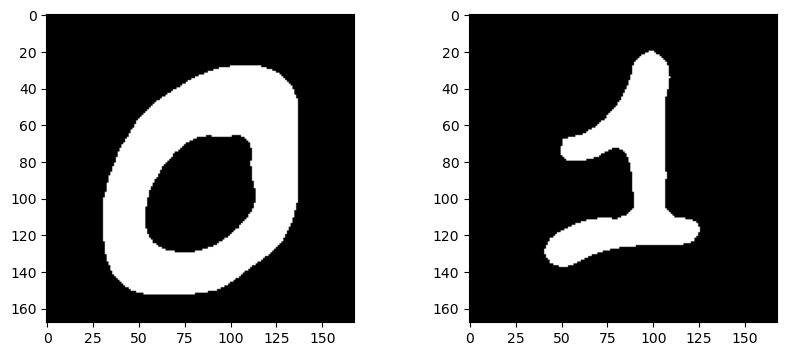

In [9]:
#Original images (for visualization only)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(zero, cmap='gray')
axes[1].imshow(one, cmap='gray')
plt.show()

#### Discussion

The results show that the accuracy improves when the number of descriptors is increased. This is because Fourier descriptors take into account the shape information of the contour. Therefore, having more descriptors allows more information in, thus, a more accurate representation. 
The first descriptor does not show meaningful reconstruction because it is the "DC" component of the image which does not contain any shape information. When printing the `descriptor_reduced` array, it is expected to see complex numbers for the first and last signals when using an even number of descriptors. This is because the Fourier transform is symmetric for real-valued input. For an even number of descriptors, the remaining descriptors will be paired up as complex conjugates. 
When printing the `contour_recon` array after applying the inverse Fourier transform, numbers are expected for all the bins, as the Fourier transform and its inverse are a pair of linear transforms that preserve all the information in the original signal.
The `freq` array obtained shows the ordering of the coefficients, which correspond to positive and negative frequencies of the Fourier components. The first term (0 frequency) corresponds to the "DC" component, followed by the positive frequencies, and then the negative frequencies. This ordering is expected, as the Fourier transform of a real-valued signal is symmetric.
Using `np.flip` to correct the reflection of the contour was used after applying the inverse Fourier transform. This is because the imaginary part of the Fourier Transform is a sine transformation which creates a flip of the image about the y-axis.

### 1.4 Clustering (2 pts)

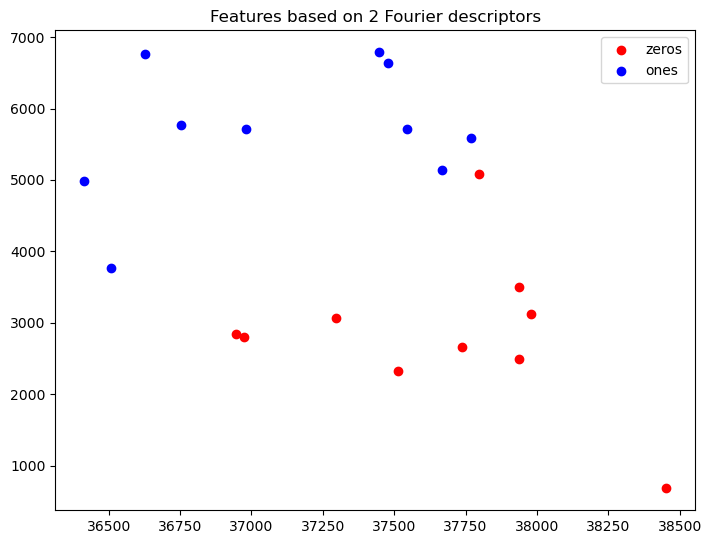

In [10]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = [np.abs(get_descriptors(zeros[i], False)[0]) for i in range(0, len(zeros))]
# Second feature for all "0"s
zeros_f2 = [np.abs(get_descriptors(zeros[i], False)[1]) for i in range(0, len(zeros))]
# Fist feature for all "1"s
ones_f1 = [np.abs(get_descriptors(ones[i], False)[0]) for i in range(0, len(zeros))]
# Second feature for all "1"s
ones_f2 = [np.abs(get_descriptors(ones[i], False)[1]) for i in range(0, len(zeros))]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


In order to cluster the images of ones and zeros above, we decide to compare them by getting the amplitude of their first two Fourrier descriptors. Since these first two descriptors (0th and 1st) correspond respectively to the positions and the very low frequency contours of our dataset, the distinction is clear. That is because the positions of the ones & zeros are different and it is generally the lower frequencies that describe the shape. In addition to that, we also tried to cluster them by their phase. This method worked but had less performance than the clustering done with amplitude comparaison.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

The main idea of obtaining features invariant to a multitude of transformations just require some basic knowledge about fourrier manipulations. **Rotating** means changing the phase of the descriptors, therefore we **take their amplitude** which remains unchanged. **Translating** means changing the 0th coefficient so we start our descriptors from the 1st, **ignoring the 0th coefficient**. The **scaling** operation scales the amplitudes of each fourrier descriptor by the same amount, we therefore take the **ratio between the amplitudes** of the descriptors. By using these simple manipulations, we expect to see and have some reasonable clusters.

#### Implementation

In [11]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    
    amplitude_descriptors= np.abs(get_descriptors(img, False))
    
    if inv_to_translation==False and inv_to_scale==False:
        #amplitude
        condition1 = [amplitude_descriptors[i] for i in range(0, 2)]
        return condition1
    
    elif inv_to_translation==True and inv_to_scale==False:
        #amplitude excluding the 0th Fourrier Coeff
        condition2= [amplitude_descriptors[i] for i in range(1, 3)]
        return condition2
    
    elif inv_to_translation==True and inv_to_scale==True:
        #ratio of amplitudes excluding the 0th Fourrier Coeff.
        condition3 = [amplitude_descriptors[i]/amplitude_descriptors[i+1] for i in range(1, 3)]
        return condition3
    
    elif inv_to_translation==False and inv_to_scale==True:
        #ratio of amplitudes
        condition4 = [amplitude_descriptors[i]/amplitude_descriptors[i+1] for i in range(0, 2)]
        return condition4
    

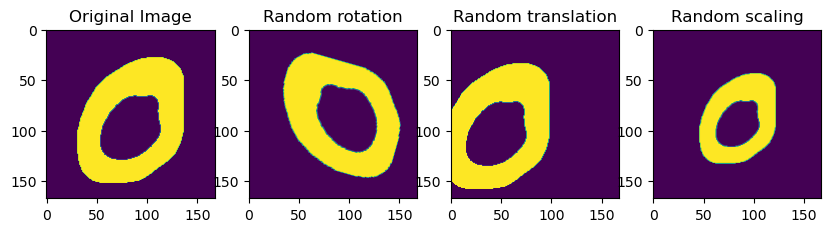

In [12]:
# Define custom rotation function. You may add other parameters to the function.

#this is a rotation function for a given angle, to make it random we can randomize the angle with a certain seed
def rotate(images, alpha):
    out = []
    for im in images:
        M = cv2.getRotationMatrix2D((im.shape[1]//2, im.shape[0]//2), alpha, 1)
        rotated = cv2.warpAffine(im, M, (im.shape[1], im.shape[0]))
        out.append(rotated)
    return np.asarray(out)

def random_rotate(img):
    # TODO
    angle = np.random.randint(0, 360)
    return rotate([img], angle)[0]

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img, max_translation=50):
    # TODO
    x = np.random.randint(-max_translation, max_translation)
    y = np.random.randint(-max_translation, max_translation)
    rows, cols = img.shape

    M = np.float32([[1, 0, x], [0, 1, y]])
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, max_scale = 1.5):
    # TODO
    scale = np.random.uniform(1/max_scale, max_scale)
    rows, cols = img.shape

    M = cv2.getRotationMatrix2D((cols/2, rows/2), 0, scale)
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst

fig, axes = plt.subplots(1, 4, figsize=(10, 4))
axes[0].imshow(zero)
axes[0].set_title("Original Image")
axes[1].imshow(random_rotate(zero))
axes[1].set_title("Random rotation")
axes[2].imshow(random_translate(zero))
axes[2].set_title("Random translation")
axes[3].imshow(random_scale(zero))
axes[3].set_title("Random scaling")
plt.show()


In [13]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = [random_rotate(img) for img in zeros]
rotated_images_ones = [random_rotate(img) for img in ones]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(img) for img in zeros]
translated_images_ones = [random_translate(img) for img in ones]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(img) for img in zeros]
scaled_images_ones = [random_scale(img) for img in ones]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_scale(random_rotate(random_translate(img))) for img in zeros]
transformed_images_ones = [random_scale(random_rotate(random_translate(img))) for img in ones]

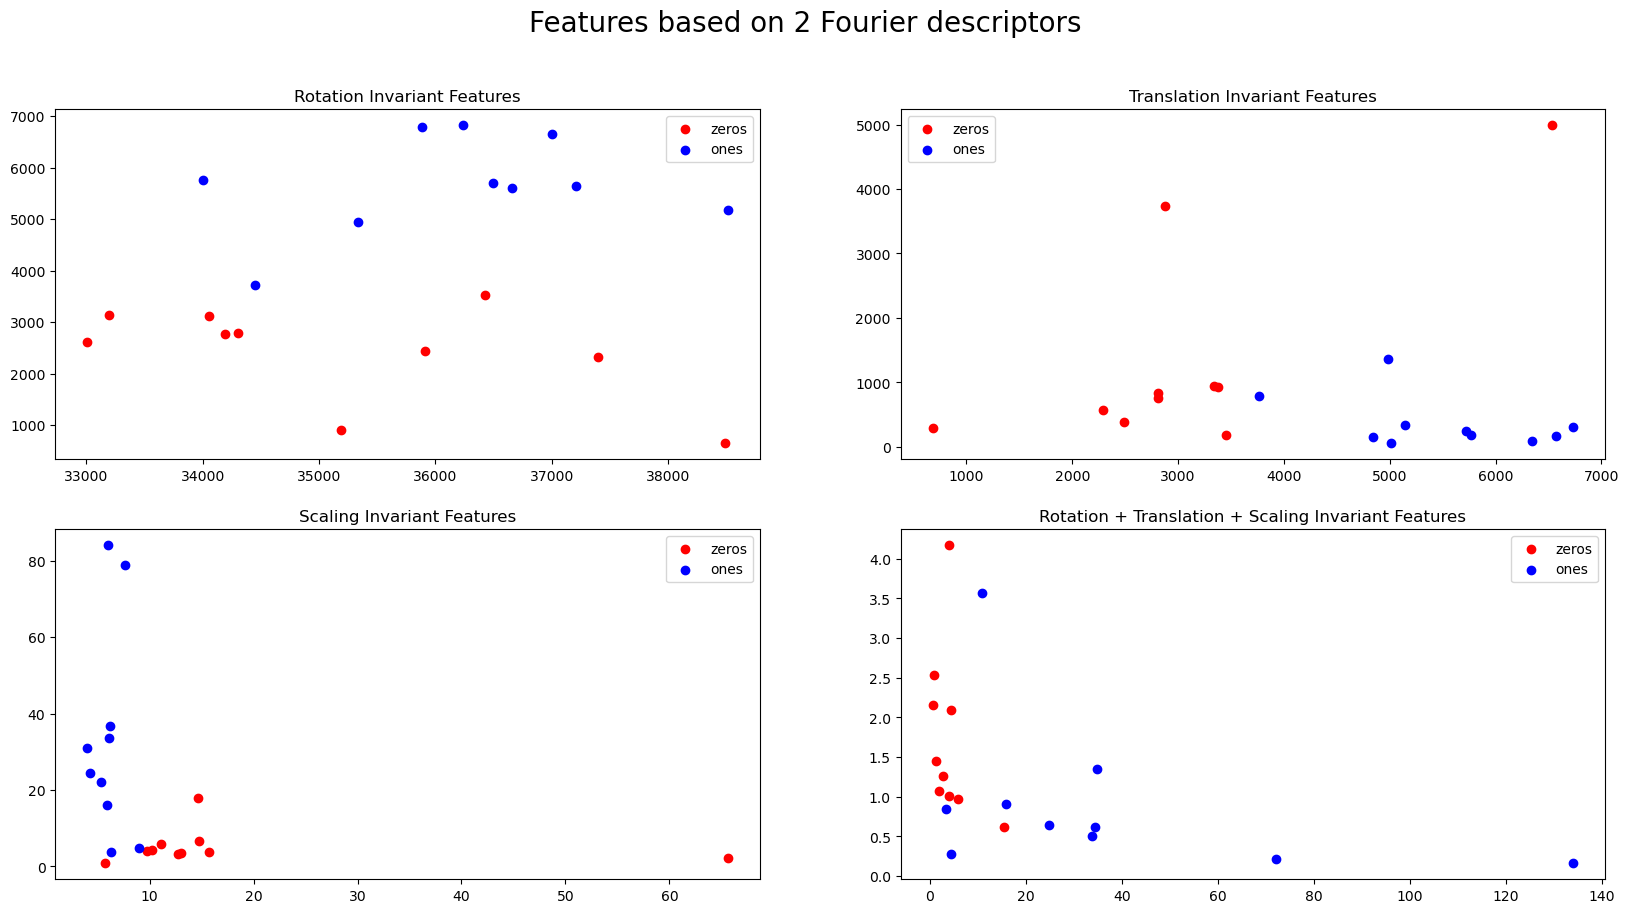

In [14]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!

fig, ax = plt.subplots(2,2, figsize=(20,10))

inv_feat1_rotate_zeros=[get_invariant_features(rotated_images_zeros[i], True, False, False)[0] for i in range(0, len(rotated_images_zeros))]
inv_feat2_rotate_zeros=[get_invariant_features(rotated_images_zeros[i], True, False, False)[1] for i in range(0, len(rotated_images_zeros))]
inv_feat1_rotate_ones=[get_invariant_features(rotated_images_ones[i], True, False, False)[0] for i in range(0, len(rotated_images_ones))]
inv_feat2_rotate_ones=[get_invariant_features(rotated_images_ones[i], True, False, False)[1] for i in range(0, len(rotated_images_ones))]

inv_feat1_translate_zeros=[get_invariant_features(translated_images_zeros[i], False, True, False)[0] for i in range(0, len(translated_images_zeros))]
inv_feat2_translate_zeros=[get_invariant_features(translated_images_zeros[i], False, True, False)[1] for i in range(0, len(translated_images_zeros))]
inv_feat1_translate_ones=[get_invariant_features(translated_images_ones[i], False, True, False)[0] for i in range(0, len(translated_images_ones))]
inv_feat2_translate_ones=[get_invariant_features(translated_images_ones[i], False, True, False)[1] for i in range(0, len(translated_images_ones))]

inv_feat1_scale_zeros=[get_invariant_features(scaled_images_zeros[i], False, False, True)[0] for i in range(0, len(scaled_images_zeros))]
inv_feat2_scale_zeros=[get_invariant_features(scaled_images_zeros[i], False, False, True)[1] for i in range(0, len(scaled_images_zeros))]
inv_feat1_scale_ones=[get_invariant_features(scaled_images_ones[i], False, False, True)[0] for i in range(0, len(scaled_images_ones))]
inv_feat2_scale_ones=[get_invariant_features(scaled_images_ones[i], False, False, True)[1] for i in range(0, len(scaled_images_ones))]

inv_feat1_transform_zeros=[get_invariant_features(transformed_images_zeros[i], True, True, True)[0] for i in range(0, len(transformed_images_zeros))]
inv_feat2_transform_zeros=[get_invariant_features(transformed_images_zeros[i], True, True, True)[1] for i in range(0, len(transformed_images_zeros))]
inv_feat1_transform_ones=[get_invariant_features(transformed_images_ones[i], True, True, True)[0] for i in range(0, len(transformed_images_ones))]
inv_feat2_transform_ones=[get_invariant_features(transformed_images_ones[i], True, True, True)[1] for i in range(0, len(transformed_images_ones))]


ax[0][0].scatter(inv_feat1_rotate_zeros, inv_feat2_rotate_zeros, color='r', label='zeros')
ax[0][0].scatter(inv_feat1_rotate_ones, inv_feat2_rotate_ones, color='b', label='ones')
ax[0][0].legend(loc='best')
ax[0][0].set_title("Rotation Invariant Features")

ax[0][1].scatter(inv_feat1_translate_zeros, inv_feat2_translate_zeros, color='r', label='zeros')
ax[0][1].scatter(inv_feat1_translate_ones, inv_feat2_translate_ones, color='b', label='ones')
ax[0][1].legend(loc='best')
ax[0][1].set_title("Translation Invariant Features")

ax[1][0].scatter(inv_feat1_scale_zeros, inv_feat2_scale_zeros, color='r', label='zeros')
ax[1][0].scatter(inv_feat1_scale_ones, inv_feat2_scale_ones, color='b', label='ones')
ax[1][0].legend(loc='best')
ax[1][0].set_title("Scaling Invariant Features")

ax[1][1].scatter(inv_feat1_transform_zeros, inv_feat2_transform_zeros, color='r', label='zeros')
ax[1][1].scatter(inv_feat1_transform_ones, inv_feat2_transform_ones, color='b', label='ones')
ax[1][1].legend(loc='best')
ax[1][1].set_title("Rotation + Translation + Scaling Invariant Features")

fig.suptitle("Features based on 2 Fourier descriptors", fontsize=20)
plt.show()

#### Discussion

We obtained these clusters using the methods we described in the **preliminary discussion**. One thing to mention is that we always use the amplitudes of the descriptors because of slightly higher clustering performances. Therefore, all our transformation invariant features start off by being invariant to rotation as the first building block. In the case of translation invariance, we ignore the 0th coefficient, and for scaling invariance, we take the ratios of the amplitudes of the descriptors. Having mentioned one more time the latter, we pass on to analyzing the clusters. We obtain the best clustering for the rotation invariant features as both classes of digits are more distinguishable. For the other clusters, we do see that it is slightly harder to seperate both classes visually as we have more outliers. Overall, these simple fourrier manipulations allow us to seperate different kind of shapes from one another in the presence of unforeseen random transformations.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### Pre-processing the images

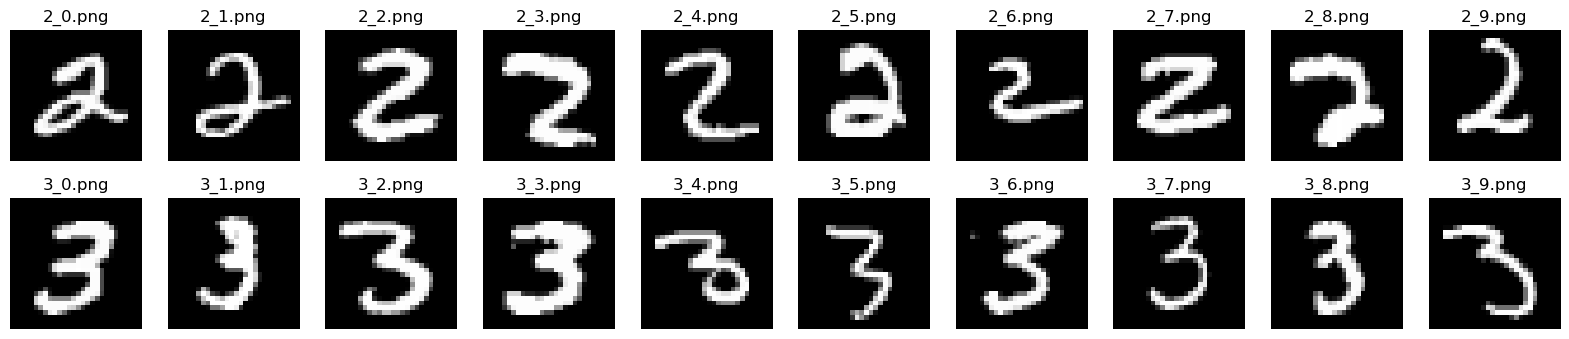

In [15]:
# Show the original images
fig, axes = plt.subplots(2, len(twos_im), figsize=(20, 4))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

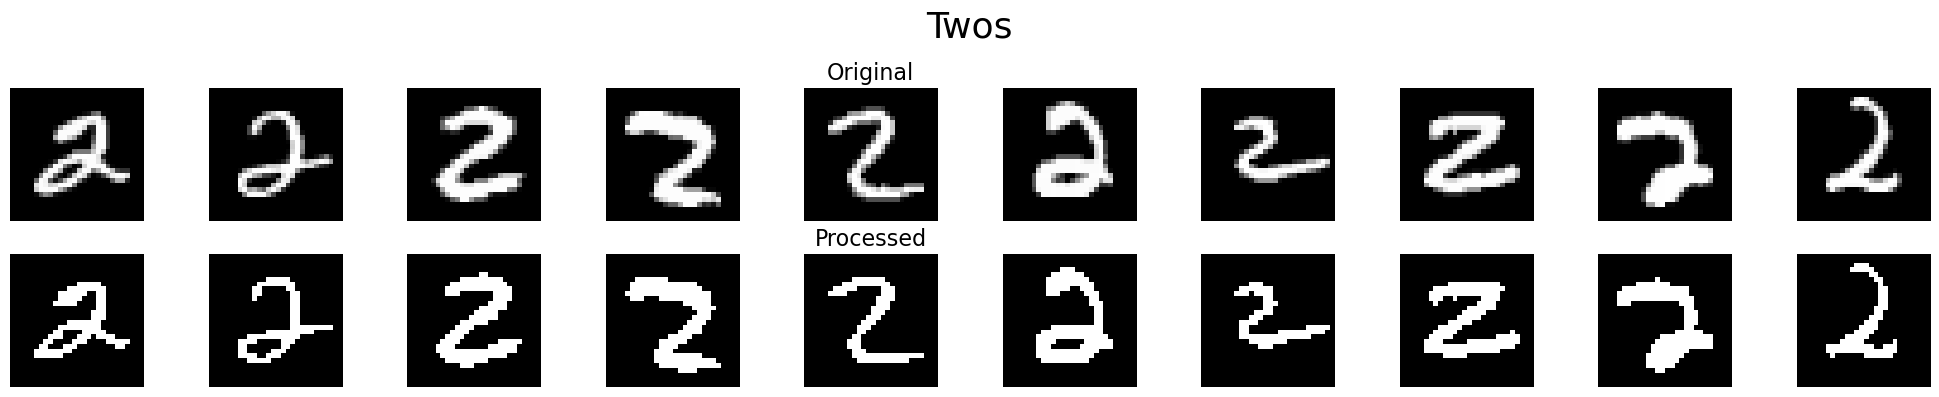

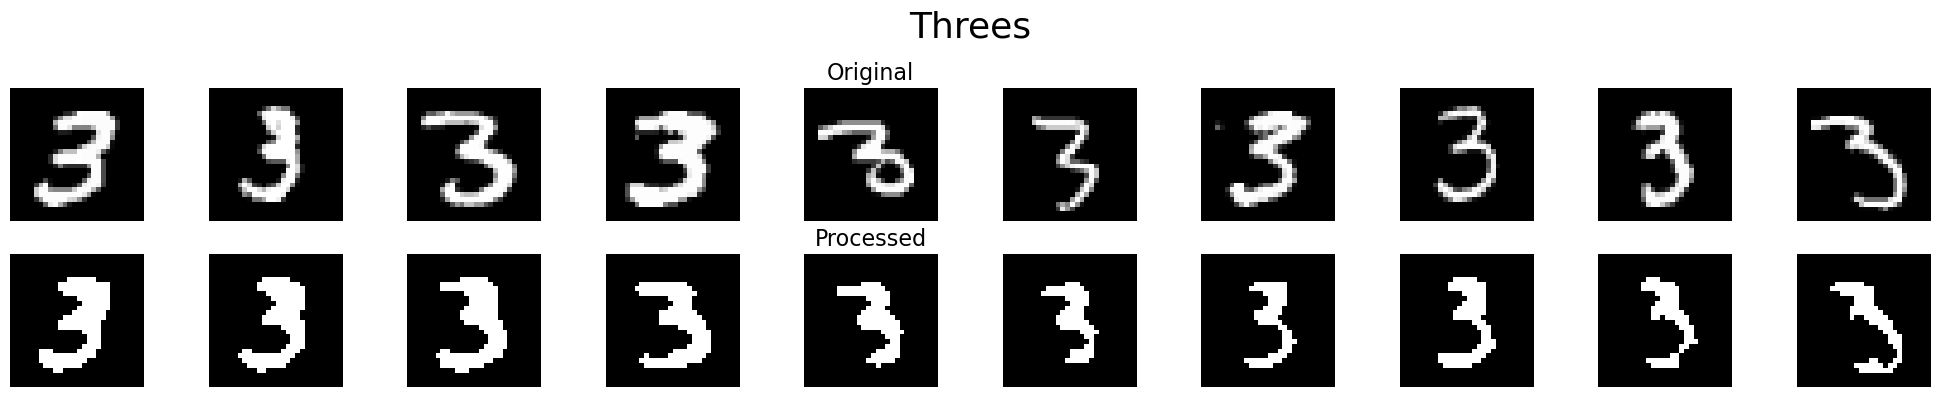

In [16]:
from skimage.morphology import binary_closing
from skimage.filters import median

# Preprocessing the images --> thresholding and morphology to remove blur and make shape uniform
twos_im_p = twos_im > 150
threes_im_p = binary_closing(median(threes_im >100))

#Plot the original and processed images
fig, axes = plt.subplots(2, len(threes_im), figsize=(20, 4))
for ax, im in zip(axes[0], twos_im):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    axes[0, 4].set_title('Original', fontsize=16)
for ax, im in zip(axes[1], twos_im_p):
    ax.imshow(im,  cmap='gray')
    ax.axis('off')
    axes[1, 4].set_title('Processed', fontsize=16)
fig.suptitle('Twos', fontsize=26) 
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, len(threes_im), figsize=(20, 4))
for ax, im in zip(axes[0], threes_im):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    axes[0, 4].set_title('Original', fontsize=16)
for ax, im in zip(axes[1], threes_im_p):
    ax.imshow(im,  cmap='gray')
    ax.axis('off')
    axes[1, 4].set_title('Processed', fontsize=16)
fig.suptitle('Threes', fontsize=26) 
plt.tight_layout()
plt.show()

In [17]:
import cv2
import numpy as np
from skimage import measure

# Define a function to calculate the area of the numbers
def get_area(image):
    # Label the connected components in the image
    labels = measure.label(image)
    # Count the number of objects in the image
    num_objects = np.max(labels)
    # Calculate the area and radius of each object
    areas = np.bincount(labels.ravel())[1:]
    
    return  areas

# Define a function to calculate the perimeter of a contour
def calculate_dims(contour):
    perimeter = cv2.arcLength(contour, True)
    return perimeter

# Define a function to extract the contours of the numbers
def get_contour(image):
    image = np.array(image, dtype=np.uint8)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [np.array(contour) for contour in contours]

# Define a function to calculate the properties of the numbers in all of the given images
def calculate_props(images):
    contours_list = []
    area_list = []
    perimeter_list = []
    compactness_list = []
    
    for image in images:
        # Extract the contours of the numbers in the image
        contours = get_contour(image)
        contours_list.append(contours)
        area = get_area(image)
        area_list.append(area)
        
        # Calculate the area, perimeter, and compactness of each contour and print the results
        for contour in contours:
            perimeter = calculate_dims(contour)
            compactness = perimeter**2/area
            perimeter_list.append(perimeter)
            compactness_list.append(compactness)
            #print("Area: {}, Perimeter: {}, Compactness: {}".format(area, perimeter, compactness))
    
    return contours_list, area_list, perimeter_list, compactness_list

tc, ta, tp, tcs= calculate_props(twos_im_p)
thc, tha, thp, thcs = calculate_props(threes_im_p)

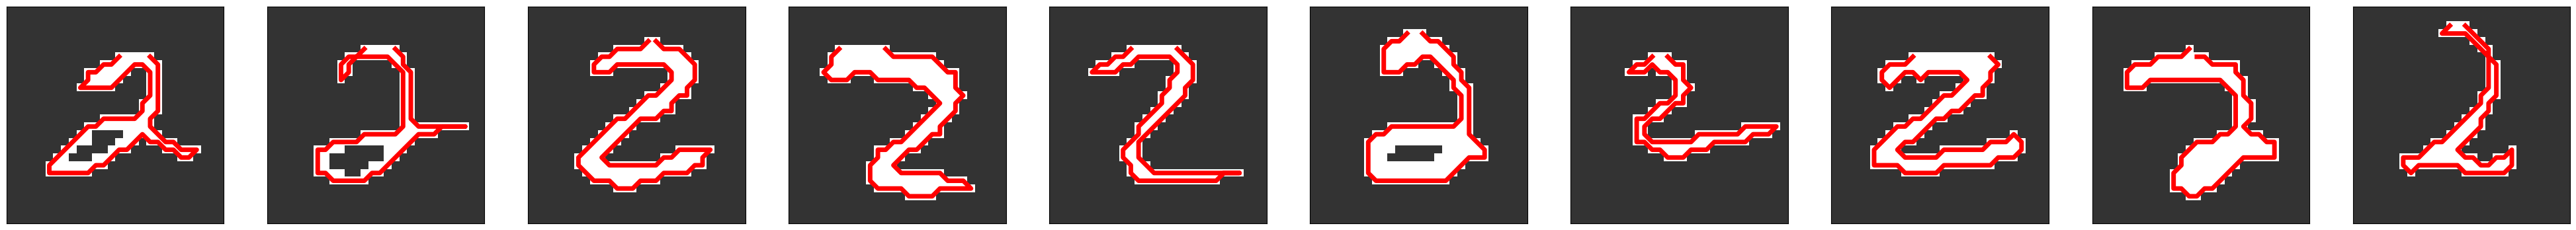

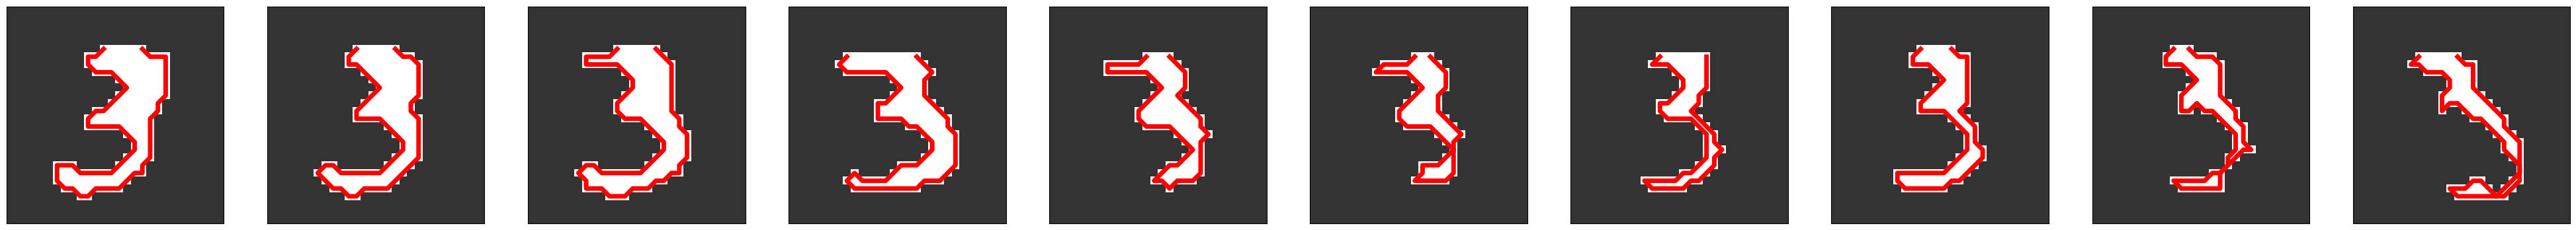

In [18]:
import cv2
import matplotlib.pyplot as plt

# Define a function to plot the image and the contours of the numbers
def plot_images_and_contours(images, contours):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images*5, 5))
    for i, image in enumerate(images):
        axes[i].imshow(image, cmap='gray', alpha=0.8)
        for c in contours[i]:
            c = np.squeeze(c, axis=1)  
            axes[i].plot(c[:, 0], c[:, 1], c='r', linewidth=5)
        axes[i].set_xticks([]), axes[i].set_yticks([])
    plt.show()
    
    
plot_images_and_contours(twos_im_p, tc)
plot_images_and_contours(threes_im_p, thc)

### 2.3. Cluster on compacity (6 pts)

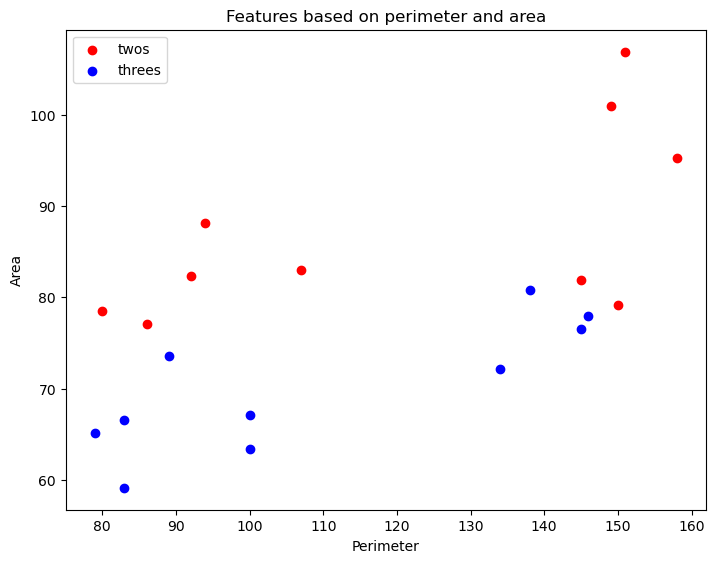

In [19]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [ta]
twos_f2 = [tp]
threes_f1 = [tha]
threes_f2 = [thp]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
ax.set_xlabel('Perimeter')
ax.set_ylabel('Area')
plt.title("Features based on perimeter and area")
plt.show()

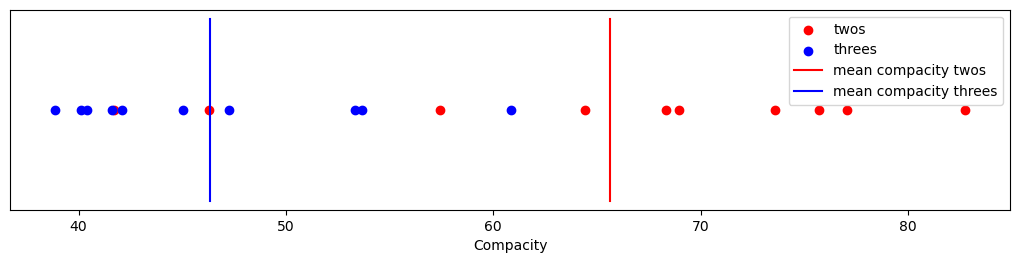

In [20]:
# TODO: Make the 1D plot of the compacity
import matplotlib.pyplot as plt
import numpy as np

y = range(-2,3,1)

# Calculate the median value of compacity found for each number set
tcs_m = np.mean(tcs)
thcs_m = np.mean(thcs)

# Plot the 1D compacity plot
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
ax.scatter(tcs, [0]*len(tcs), color='r', label='twos')
ax.scatter(thcs, [0]*len(thcs), color='b', label='threes')
ax.plot([tcs_m]*len(y), y, color='r', label='mean compacity twos')
ax.plot([thcs_m]*len(y), y, color='b', label='mean compacity threes')
ax.legend(loc='best')
ax.set_xlabel('Compacity')
ax.set_yticks([])
plt.show()

####  Discussion

Looking at the two plots, the 2D feature plot with the areas and the perimeteres, and the 1D compacity plot, we can distinguish, with few outliers, two distincts clusters of 2s and 3s. This is most likely due to the preprocessing that was applied to both image sets that resulted in each set having relatively uniform features. The values of the compaxcity are higher than 12.56, indicating that the chosen definition of area and perimeter is valid. 
Using the compacity plot or the area-perimeter plot, we can easily define a calssification method. Additionally, plotting the mean value of compacity for each we can clearly see the difference between the two numbers. This can provide a good start for a statistically based classification method

### 2.2. Additional method (4 pts)

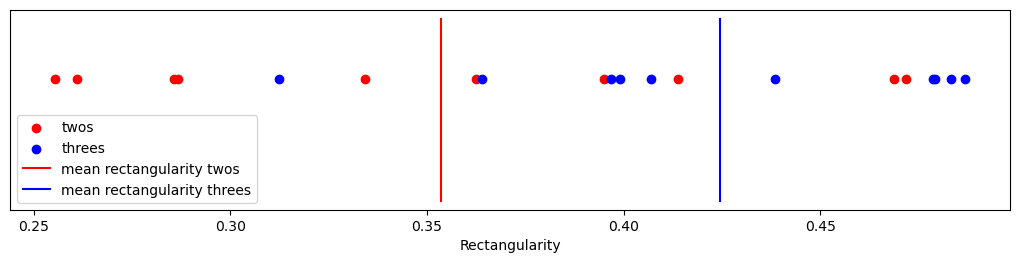

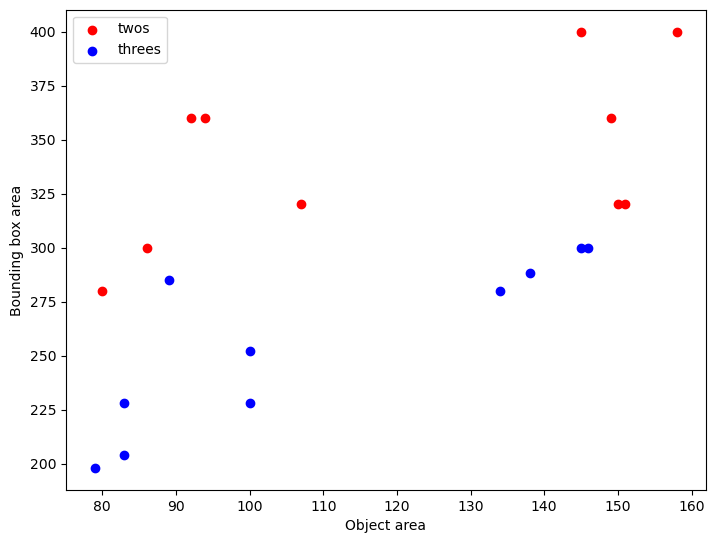

In [21]:
import cv2
import numpy as np
from PIL import Image

def get_object_area(image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Select the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the area of the object
    object_area = cv2.contourArea(largest_contour)

    return object_area

def calculate_area_ratio(images):
    rects = []
    bb_area = []
    for image in images:
        image = np.array(image, dtype=np.uint8)
        # Find the area of the object
        object_area = get_area(image)

        # Find the bounding box of the object
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Calculate the area of the bounding box
        bounding_box_area = w * h

        # Calculate rectangularity
        rect = object_area / bounding_box_area

        rects.append(rect)
        bb_area.append(bounding_box_area)

    return rects, bb_area

rt, bbt = calculate_area_ratio(twos_im_p)
rth, bbth = calculate_area_ratio(threes_im_p)


y = range(-2,2,1)

rt_m = np.mean(rt)
rth_m = np.mean(rth)

#Plot the 1D plot for rectangularity
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
ax.scatter(rt, [0]*len(rt), color='r', label='twos')
ax.scatter(rth, [0]*len(rth), color='b', label='threes')
ax.plot([rt_m]*len(y), y, color='r', label='mean rectangularity twos')
ax.plot([rth_m]*len(y), y, color='b', label='mean rectangularity threes')
ax.legend(loc='best')
ax.set_xlabel('Rectangularity')
ax.set_yticks([])
plt.show()


# Plot the 2D feature plot based on the area of the number and that of its bounding box
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(ta, bbt, color='r', label='twos')
ax.scatter(tha, bbth, color='b', label='threes')
ax.legend(loc='best')
ax.set_xlabel('Object area')
ax.set_ylabel('Bounding box area')
plt.show()


### Discussion

The chosen additional region based descriptor is the rectangularity. Rectangularity is calculated as the ratio between the area of the object in the image and the area of the bounding rectangle. Functions were defined to extract these two areas for all of the numbers in the image sets. Two ways of clustering are proposed, a 1D plot of rectangularity that is similar to the one used for compacity, and a 2D feature plot that used the object area and the bounding box area.
In both plots a relatively distinct cluster can be identified for each number set. The 2D feature plot does however, provide more distinct clusters for the two numbers. 